# Ensemble Methods

Two typically used ensemble emthods as **Bagging** (short for **B**ootstrap **agg**regat**ing**) and **Boosting**.

Here we put together **multiple models** (Weak Learners) to a **combined model** (Strong Learner).

### SciKit Learn 

see [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html) in SciKit Learn

## Why to put Ensemble Learners Together?

There are two competing variables in finding a well fitting model: **Bias** and **Variance**.

### Bias

When a model has **high bias**, this means that it doesn't do a good job of bending to the data. 

An **example** of an algorithm that usually has **high bias**  and **low variance** is **linear regression**. Even with completely different datasets, we end up with the same line fit to the data (see [Anscombe Data](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) examples below). 

When models have high bias, this is bad.

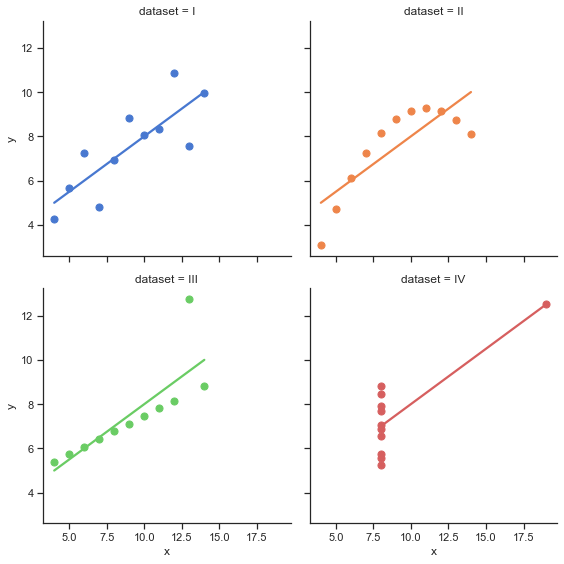

In [43]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

In [52]:
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Variance

When a model has **high variance**, this means that it changes drastically to meet the needs of every point in our dataset. 

An **example** of an algorithm that tends to have **high variance** and **low bias** is a **decision tree** (especially decision trees with no early stopping parameters). 

A decision tree, as a high variance algorithm, will attempt to split every point into its own branch if possible. This is a trait of high variance, low bias algorithms - they are extremely **flexible** to **fit exactly whatever data they see**.

### Combining Algorithms

By **combining algorithms**, we can often build models that perform better by meeting in the **middle** in terms of **bias** and **variance**.

These ideas are based on minimizing bias and variance based on mathematical theories, like the **central limit theorem**.

### Randomness

Another method used to improve ensemble methods is to **introduce randomness** into high variance algorithms before they are ensembled together. The introduction of randomness combats the tendency of these algorithms to overfit (or fit directly to the data available). 

There are two main ways that randomness is introduced:

1. **Bootstrap the data**
2. **Subset the features**

These two random components are e.g. used in the **random forests** algorithm.

#### Bootstrap the Data

**Bootsrapping** means sampling the data with **replacement** and fitting your algorithm to the sampled data. 

**Example**: Given a dataset, we first choose the size `n_samples` of the sample. Then we randomly choose an observation from the dataset and put it to the sample and return this observation to the dataset. This is done `n_samples` times. We now have our data sample which can have an observation more than once. Those observations not chosen for the sample are the out-of-bag observations.

In the case of evaluating a machine learning model, the model is fit on the drawn sample and evaluated on the out-of-bag sample.

In [80]:
from sklearn.utils import resample

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]                 # data sample

boot = resample(data, replace=True, n_samples=4)       # bootstrap sample: train
print('Bootstrap Sample: %s' % boot)

oob = [x for x in data if x not in boot]               # out of bag observations: test
print('OOB Sample: %s' % oob)

Bootstrap Sample: [5, 2, 3, 5]
OOB Sample: [1, 4, 6, 7, 8, 9, 10]


#### Subset the Features

In each split of a decision tree or with each algorithm used in an ensemble, only a subset of the total possible features are used.

## Bagging

Train a weak learner on **subsets of the data** and then **combine** these learners.

In [121]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor

dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [123]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
model.fit(X_train, y_train)
print(f' Test Score: {model.score(X_test, y_test):.3f}')
print(f' Training Score: {model.score(X_train, y_train):.3f}')

 Test Score: 0.937
 Training Score: 0.991


In [124]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
bgmodel = BaggingRegressor(base_estimator=model, n_estimators=100, max_features=10, max_samples=100, n_jobs=5)

bgmodel.fit(X_train, y_train)
print(f' Test Score: {bgmodel.score(X_test, y_test):.3f}')
print(f' Training Score: {bgmodel.score(X_train, y_train):.3f}')

 Test Score: 0.853
 Training Score: 0.914


## Boosting

Boosting is a general method for **improving the accuracy** of any given learning algorithm.

### AdaBoost (Adaptive Boosting)

Weighting the model:

$$
\text{weight} = ln \, \Big(\frac{\text{accuracy}}{1 - \text{accuracy}} \Big)
$$

with

$$
\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [41]:
import numpy as np
np.round(np.log((7 / 8)/(1 - (7 / 8))), 2)

1.95

## AdaBoost in SciKitLearn

See [Adaptive Boosting](https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_adaboost.html)

In [42]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
model.predict(X_test)

NameError: name 'x_train' is not defined

### Hyperparameters

The most common hyperparameters for AdaBoost are

* `base_estimator`: The model utilized for the weak learners
* `n_estimators`: The maximum number of weak learners used

For example, here we define a model which uses decision trees of max_depth 2 as the weak learners, and it allows a maximum of 4 of them:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), n_estimators = 4)